**AIML Online Capstone - AUTOMATIC TICKET ASSIGNMENT**

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the
above Objective. An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

**Business Domain Value**

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.
Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

**Project Description**

***Pre-Processing, Data Visualization and EDA***
● Exploring the given Data files
● Understanding the structure of data
● Missing points in data
● Finding inconsistencies in the data
● Visualizing different patterns
● Visualizing different text features
● Dealing with missing values
● Text preprocessing
● Creating word vocabulary from the corpus of report text data
● Creating tokens as required

***Model Building***

● Building a model architecture which can classify.
● Trying different model architectures by researching state of the art for similar tasks.
● Train the model
● To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

***Test the Model, Fine-tuning and Repeat ***

● Test the model and report as per evaluation metrics ● Try different models 
● Try different evaluation metrics 
● Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them 
● Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

# **Libraries**

In [84]:
#libraries used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from wordcloud import WordCloud
import pickle
import os, sys, itertools, re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# We will not do stemming, instead use more intelligent way to get the root word using  lemmatization
from nltk.stem import WordNetLemmatizer
from matplotlib import cm

# **Exploring the given Data files**

In [2]:
file_path = '/content/drive/MyDrive/Capstone/input_data.xlsx'

ticketData=pd.read_excel(file_path)
ticketData.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [3]:
ticketData.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

In [4]:
ticketData.sample()

Short description  \
2885  my 2nd monitor will not display any video, it ...   

                                            Description             Caller  \
2885  my 2nd monitor will not display any video, it ...  wlsazrce uwehsqbk   

     Assignment group  
2885            GRP_3

# **Understanding the structure of data**

In [6]:
print('No of rows:', ticketData.shape[0])
print('No of columns:', ticketData.shape[1])

No of rows: 8500
No of columns: 4


In [7]:
ticketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [8]:
ticketData['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [9]:
ticketData["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [10]:
ticketData.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

1. Our dataset has 4 columns and 8500 rows.
2. There are 74 unique groups in target variable
3. About 3976 Tcikets are assigned to GRP0, while there are many groups
   assigned with only 1 ticket, which shows the distribution of data is
   highly imbalanced.

# **Missing points in data**

In [11]:
ticketData.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

1. Short Description and Description columns appear to have null values

# **Dealing with missing values**

In [12]:
ticketData[pd.isnull(ticketData).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [13]:
ticketData.fillna(str(), inplace=True)
ticketData[pd.isnull(ticketData).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [14]:
ticketData.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

We are not dropping any null rows, just imputing them with string, as we do not want any loss of information

# **Finding inconsistencies in the data**

In [15]:
ticketData[ticketData.Description == 'the'].head()

Short description Description  \
1049  reset passwords for soldfnbq uhnbsvqd using pa...         the   
1054  reset passwords for fygrwuna gomcekzi using pa...         the   
1144  reset passwords for wvdxnkhf jirecvta using pa...         the   
1184  reset passwords for pxvjczdt kizsjfpq using pa...         the   
1292  reset passwords for cubdsrml znewqgop using pa...         the   

                 Caller Assignment group  
1049  soldfnbq uhnbsvqd           GRP_17  
1054  fygrwuna gomcekzi           GRP_17  
1144  wvdxnkhf jirecvta           GRP_17  
1184  pxvjczdt kizsjfpq           GRP_17  
1292  cubdsrml znewqgop           GRP_17

In [16]:
len(ticketData[ticketData.Description == 'the'])

56

The top occuring Description in the dataset is the text 'the',
which doesn't make any sense, but the short description for these rows
shows that its a password reset issue.

In [17]:
sample = ticketData.groupby(['Assignment group'])
regroup=[]
#print(sample.get_group(grp).shape[0])
for grp in ticketData['Assignment group'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
print(regroup)

Found 25 groups which have under 10 samples
['GRP_35', 'GRP_38', 'GRP_43', 'GRP_46', 'GRP_49', 'GRP_51', 'GRP_52', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59', 'GRP_61', 'GRP_32', 'GRP_63', 'GRP_64', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73']


1. There are 25 groups in the target variable which have under 10 instances appearing in the dataset

# **Visualizing different patterns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


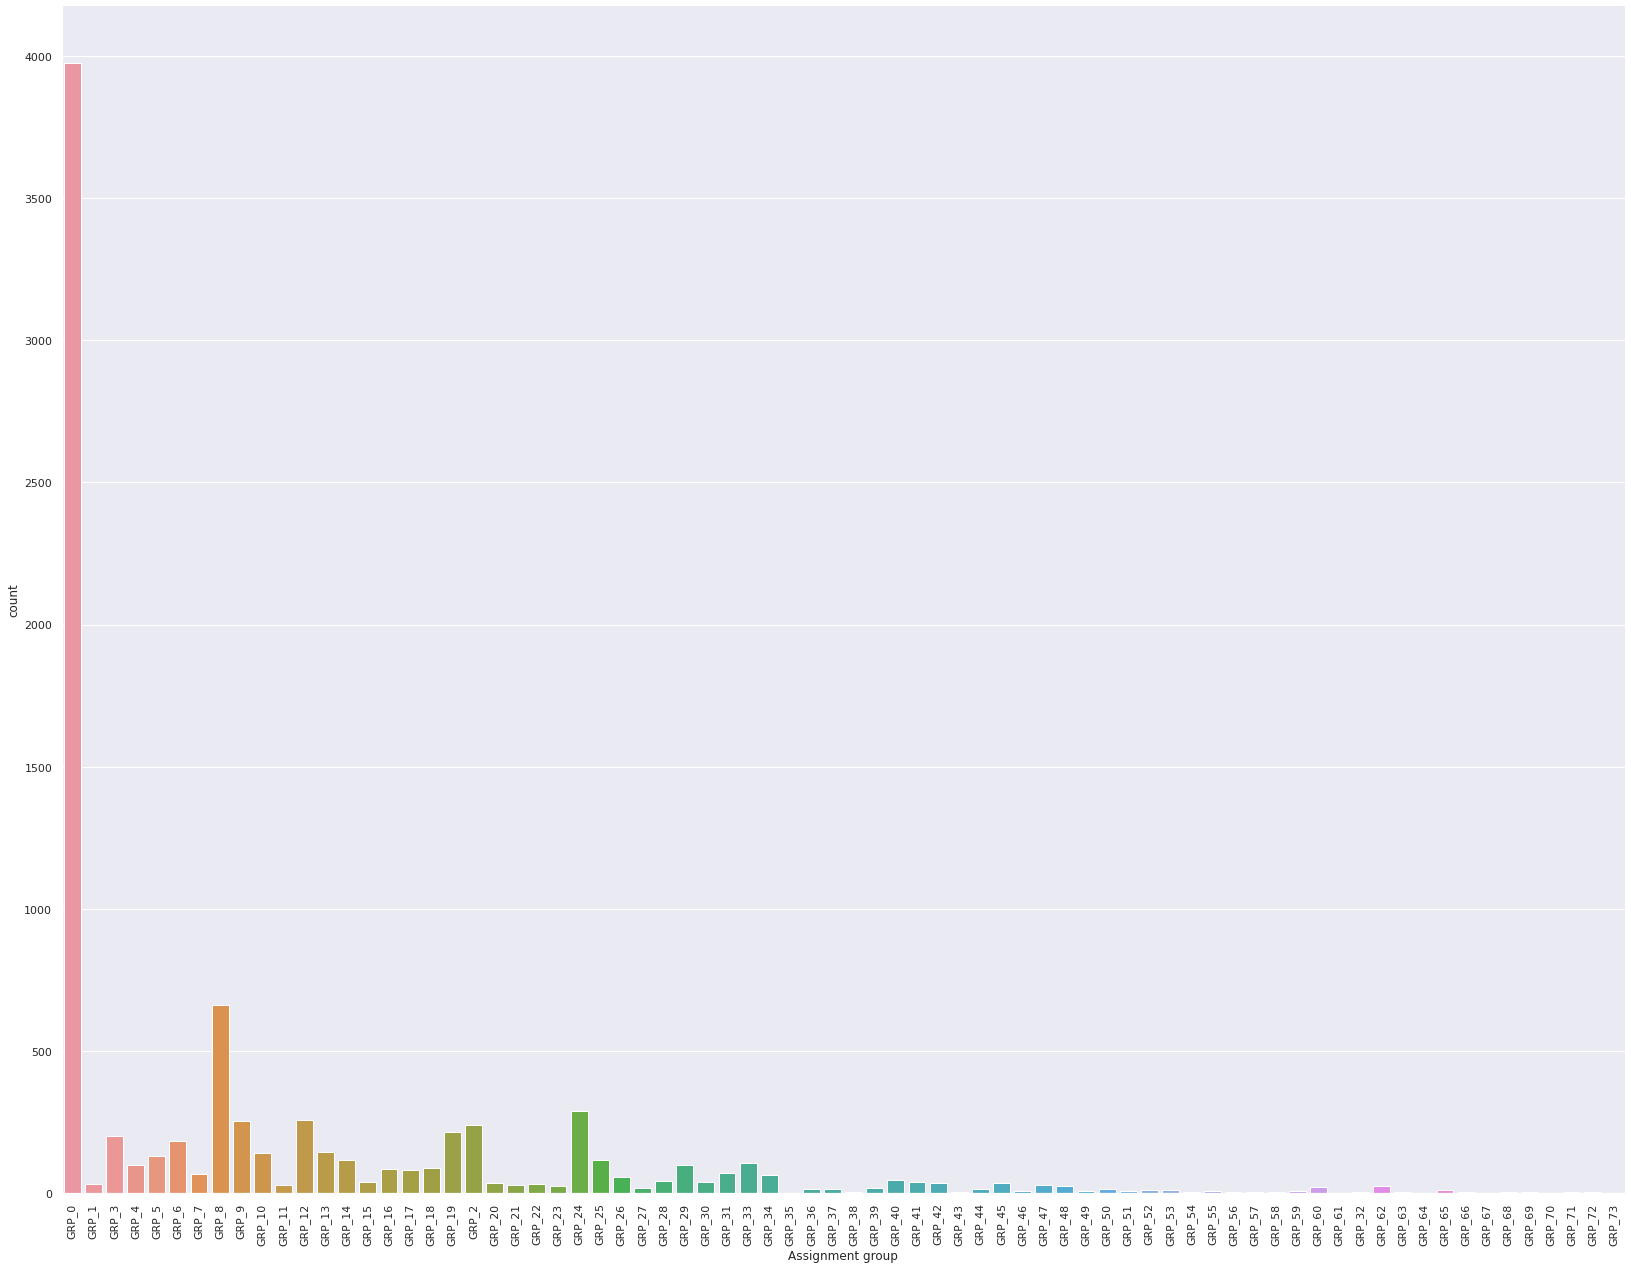

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)})
sns.catplot("Assignment group",data=ticketData,kind='count')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches( 30, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


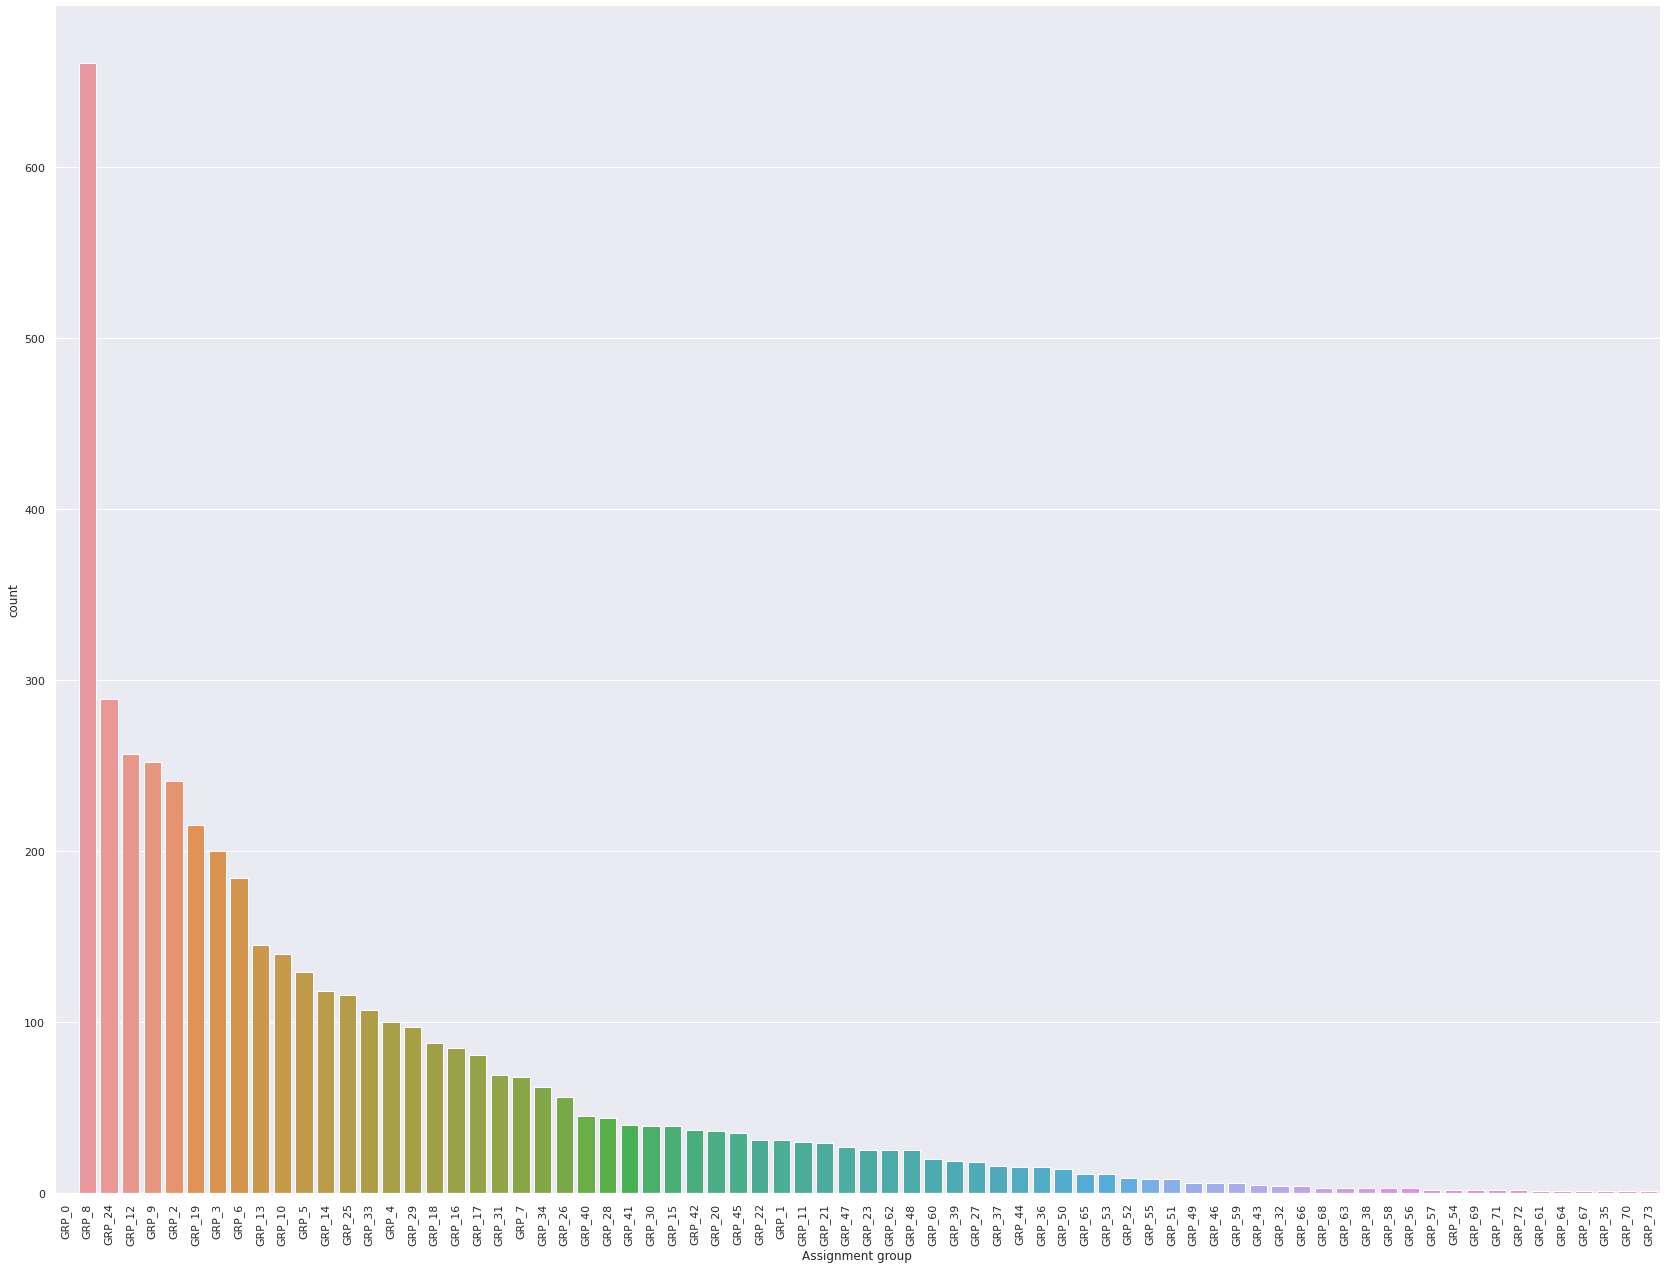

In [22]:
ticketData_temp = ticketData[ticketData["Assignment group"] != 'GRP_0']
sns.set(rc={'figure.figsize':(30,15)})
sns.catplot("Assignment group",data=ticketData_temp,kind='count',order=descending_order)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches( 30, 20)

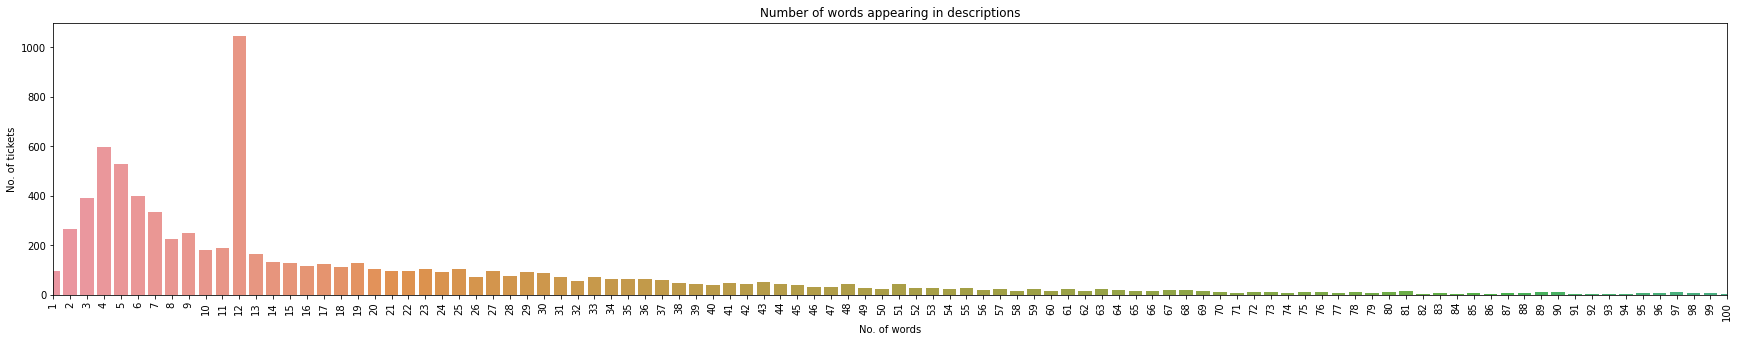

In [ ]:
plt.subplots(figsize = (30,5))

sns.countplot(x=ticketData['Description'].str.split().map(lambda x: len(x)), data=ticketData)
plt.xlabel('No. of words') 
plt.ylabel('No. of tickets') 
plt.xticks(rotation=90)
plt.title('Number of words appearing in descriptions')

plt.xlim([1, 100])
plt.show()

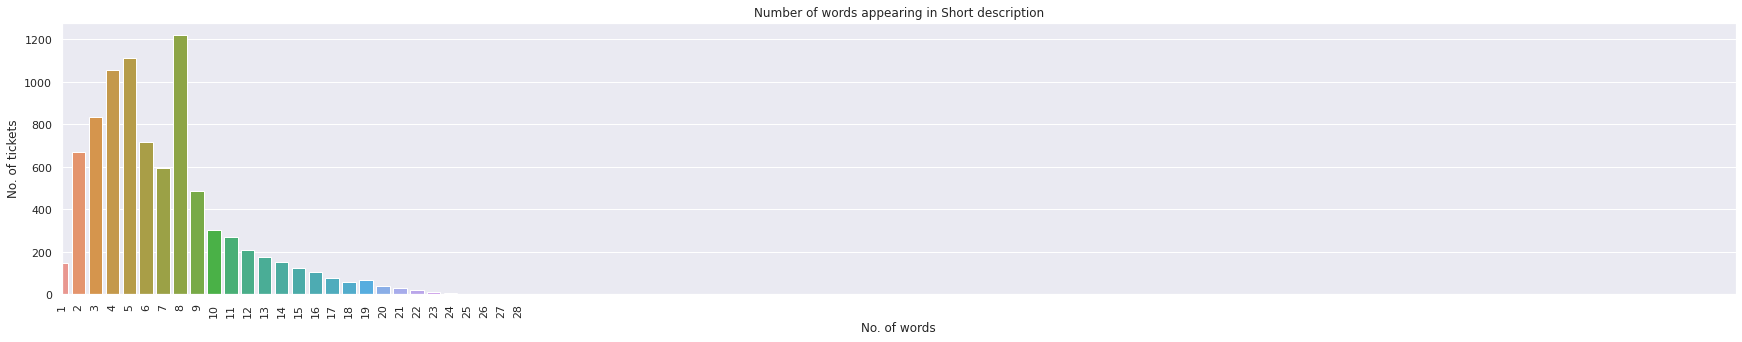

In [28]:
plt.subplots(figsize = (30,5))

sns.countplot(x=ticketData['Short description'].str.split().map(lambda x: len(x)), data=ticketData)
plt.xlabel('No. of words') 
plt.ylabel('No. of tickets') 
plt.xticks(rotation=90)
plt.title('Number of words appearing in Short description')

plt.xlim([1, 100])
plt.show()

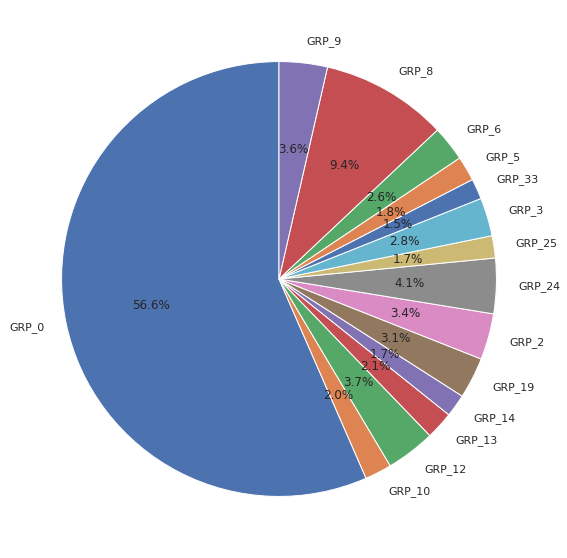

In [23]:
ticketData_new = ticketData[ticketData['Assignment group'].map(ticketData['Assignment group'].value_counts()) > 100]

assgn_grp = pd.DataFrame(ticketData_new.groupby('Assignment group').size(),columns = ['Count']).reset_index()

plt.pie(assgn_grp["Count"], labels = assgn_grp["Assignment group"], autopct='%1.1f%%', shadow=False, startangle=90)
fig = plt.gcf()
fig.set_size_inches( 10, 10)
plt.show()

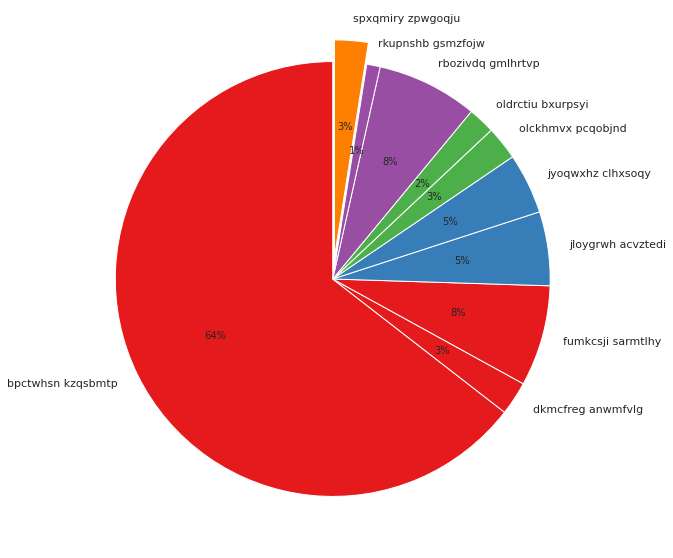

In [26]:
ticketData_new = ticketData[ticketData['Caller'].map(ticketData['Caller'].value_counts()) > 50].head(200)

assgn_grp = pd.DataFrame(ticketData_new.groupby('Caller').size(),columns = ['Count']).reset_index()
cs=cm.Set1(np.arange(20)/20.)
explode = (0, 0, 0, 0,0,0,0,0,0,0.1)
fig1, ax1 = plt.subplots()
plt.pie(assgn_grp["Count"], labels = assgn_grp["Caller"], autopct='%1.0f%%', shadow=False, startangle=90,explode=explode,colors=cs)
fig = plt.gcf()
fig.set_size_inches( 10, 10)
plt.show()

In [27]:
top_n = 5
s = ticketData['Caller'].groupby(ticketData['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

# **Visualizing different text features**

In [29]:
convert_dict = {
    'Short description':str,
    'Description':str,
    'Caller':str,
    'Assignment group':str,
}
tickets_df = ticketData.astype(convert_dict)

In [30]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


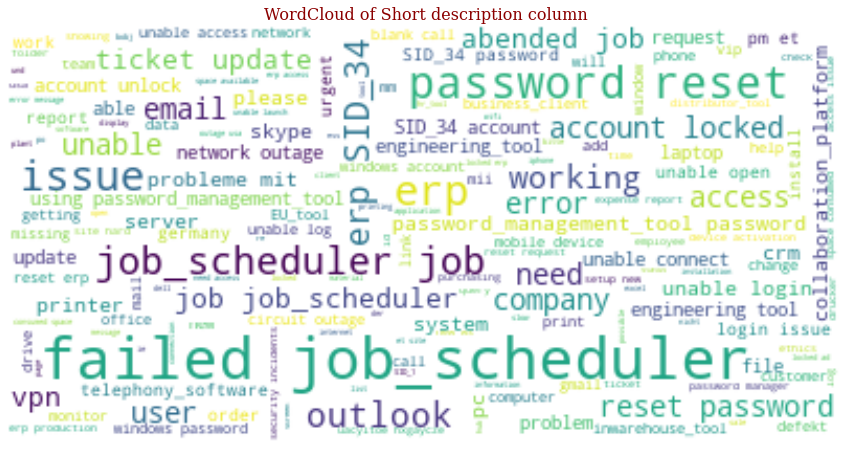

In [31]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df['Short description'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

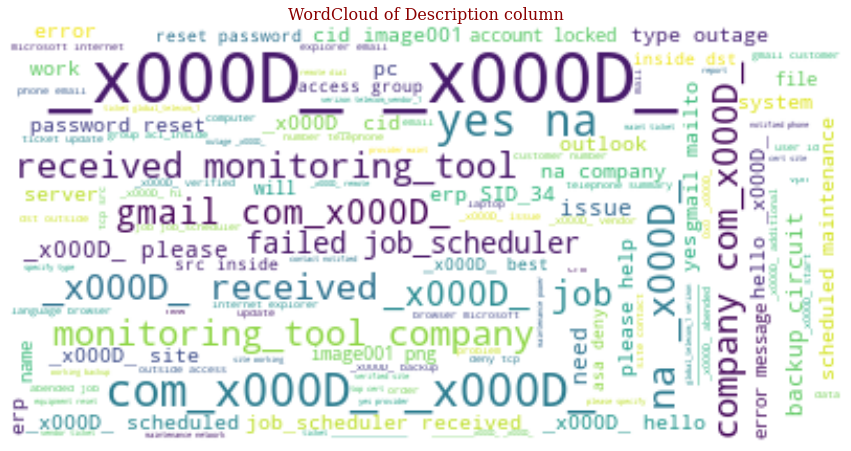

In [32]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df['Description'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

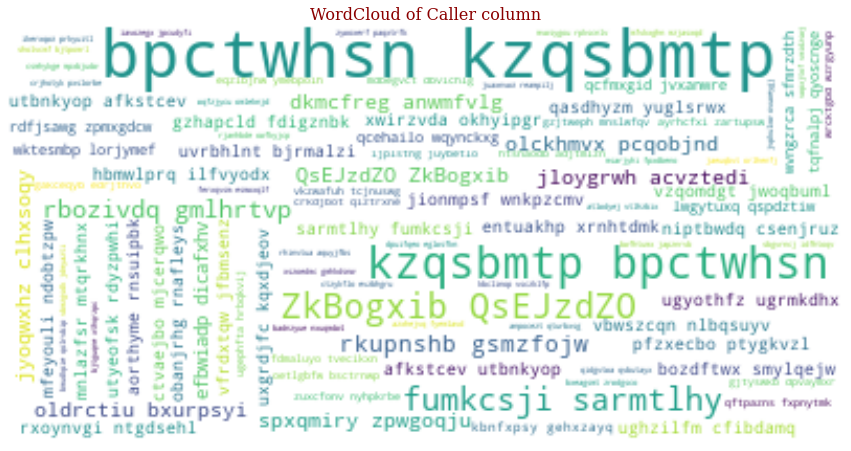

In [33]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df['Caller'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Caller column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Text preprocessing**

In [34]:
ticketData['Description'] = ticketData['Description'].str.replace('x000D', '')
ticketData['Short description'] = ticketData['Short description'].str.replace('x000D', '')

In [35]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False
callers = ticketData['Caller'].unique() 
callers.shape
def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
ticketData['Description'] = ticketData['Description'].apply(clean_data)
ticketData['Short description'] = ticketData['Short description'].apply(clean_data)


In [36]:
ticketData.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details employee and manager nam...  spxjnwir pjlcoqds   
1  hello team my meetings skype meetings etc are ...  hmjdrvpb komuaywn   
2                       hi cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [37]:
ticketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [38]:
ticketData['Combined Description'] = ticketData['Short description'].str.cat(ticketData['Description'], sep=' ', na_rep=' ')
ticketData.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details employee and manager nam...  spxjnwir pjlcoqds   
1  hello team my meetings skype meetings etc are ...  hmjdrvpb komuaywn   
2                       hi cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                               Combined Description  
0            GRP_0  login issue verified user details employee and...  
1            GRP_0  outlook hello team my meetings skype meetings ...  
2            GRP_0    cant log in to vpn hi cannot log on to vpn best  
3            GRP_0  unable to access hr tool page unable to access...  
4            GRP_0                            skype error skype error

In [39]:
ticketData['Description WordCount'] = [len(desc.split(' ')) for desc in ticketData['Combined Description']]
ticketData.head()
wordCount_before = ticketData['Description WordCount'].sum()

In [40]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  262512


In [86]:
ticketData.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details employee and manager nam...  spxjnwir pjlcoqds   
1  hello team my meetings skype meetings etc are ...  hmjdrvpb komuaywn   
2                       hi cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                               Combined Description  \
0            GRP_0  login issue verified user details employee and...   
1            GRP_0  outlook hello team my meetings skype meetings ...   
2            GRP_0    cant log in to vpn hi cannot log on to vpn best   
3            GRP_0  unable to access hr tool page unable to access...   
4            GRP_0                            skype error skype error   

   Description WordCount  
0                     36  
1                     24  
2                     12  
3                     12  
4                      4

In [87]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(ticketData['Combined Description']):
  ticketData['Combined Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

ticketData['Clean Description'] = ticketData['Combined Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [88]:
ticketData['Clean WordCount'] = [len(desc.split(' ')) for desc in ticketData['Clean Description']]
ticketData.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details employee and manager nam...  spxjnwir pjlcoqds   
1  hello team my meetings skype meetings etc are ...  hmjdrvpb komuaywn   
2                       hi cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                               Combined Description  \
0            GRP_0  login issue verified user details employee man...   
1            GRP_0  outlook hello team meetings skype meetings etc...   
2            GRP_0                cant log vpn hi cannot log vpn best   
3            GRP_0  unable access hr tool page unable access hr to...   
4            GRP_0                            skype error skype error   

   Description WordCount                                  Clean Description  \
0                     36  login issue verify user detail employee manage...   
1                     24  outlook hello team meeting skype meeting etc a...   
2                     12            can not log vpn hi can not log vpn best   
3                     12  unable access hr tool page unable access hr to...   
4                      4                            skype error skype error   

   Clean WordCount  
0               24  
1               15  
2               10  
3               10  
4                4

In [89]:
!python -m pip install -U gensim

In [90]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install -q pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [107]:
combined_text=ticketData['Clean Description'].values.tolist()

In [108]:
combined_text[7]

'ticket employment status new non employee enter user name ticket employment status new non employee enter user name'

In [109]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [110]:
print(data_words[7])

['ticket', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user', 'name', 'ticket', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user', 'name']


In [111]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [112]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


In [113]:
data_words_bigrams = make_bigrams(data_words)

In [114]:
print(data_words_bigrams[7])

['ticket', 'employment_status', 'new', 'non', 'employee', 'enter', 'user', 'name', 'ticket', 'employment_status', 'new', 'non', 'employee', 'enter', 'user', 'name']


In [116]:
test_df = ticketData.copy()
test_df['words'] = data_words_bigrams
test_df

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr tool page   
4                                           skype error   
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                           telephony software issue   
8497   vip windows password reset for tifpdchb pedxruyf   
8498                          machine o est funcionando   
8499  an mehreren pc lassen sich verschiedene prgram...   

                                            Description             Caller  \
0     verified user details employee and manager nam...  spxjnwir pjlcoqds   
1     hello team my meetings skype meetings etc are ...  hmjdrvpb komuaywn   
2                          hi cannot log on to vpn best  eylqgodm ybqkwiam   
3                         unable to access hr tool page  xbkucsvz gcpydteq   
4                                           skype error  owlgqjme qhcozdfx   
...                                                 ...                ...   
8495  good afternoon am not receiving the emails tha...  avglmrts vhqmtiua   
8496                           telephony software issue  rbozivdq gmlhrtvp   
8497   vip windows password reset for tifpdchb pedxruyf  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc lassen sich verschiedene prgram...  kqvbrspl jyzoklfx   

     Assignment group                               Combined Description  \
0               GRP_0  login issue verified user details employee man...   
1               GRP_0  outlook hello team meetings skype meetings etc...   
2               GRP_0                cant log vpn hi cannot log vpn best   
3               GRP_0  unable access hr tool page unable access hr to...   
4               GRP_0                            skype error skype error   
...               ...                                                ...   
8495           GRP_29  emails coming zz mail good afternoon receiving...   
8496            GRP_0  telephony software issue telephony software issue   
8497            GRP_0  vip windows password reset tifpdchb pedxruyf v...   
8498           GRP_62  machine est funcionando unable access machine ...   
8499           GRP_49  mehreren pc lassen sich verschiedene prgramdnt...   

      Description WordCount  \
0                        36   
1                        24   
2                        12   
3                        12   
4                         4   
...                     ...   
8495                     21   
8496                      6   
8497                     14   
8498                     21   
8499                     20   

                                      Clean Description  Clean WordCount  \
0     login issue verify user detail employee manage...               24   
1     outlook hello team meeting skype meeting etc a...               15   
2               can not log vpn hi can not log vpn best               10   
3     unable access hr tool page unable access hr to...               10   
4                               skype error skype error                4   
...                                                 ...              ...   
8495  email come zz mail good afternoon receive emai...               13   
8496  telephony software issue telephony software issue                6   
8497  vip windows password reset tifpdchb pedxruyf v...               12   
8498  machine est funcionando unable access machine ...               12   
8499  mehreren pc lassen sich verschiedene prgramdnt...               18   

                                                  words  
0     [login, issue, verify, user, detail, employee,...  
1     [outlook, hello, team, meeting, skype, meeting...  
2      [can_not, lo

In [117]:
value = test_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_31',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_48', 'GRP_60', 'GRP_39',
       'GRP_27', 'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_55', 'GRP_51', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_66', 'GRP_68', 'GRP_63', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [118]:
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

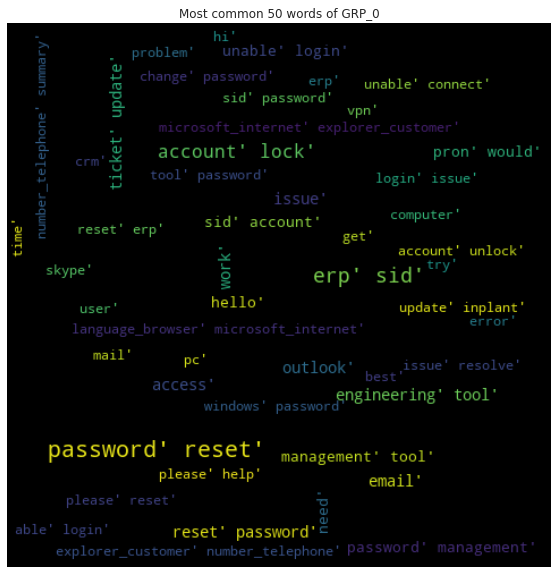

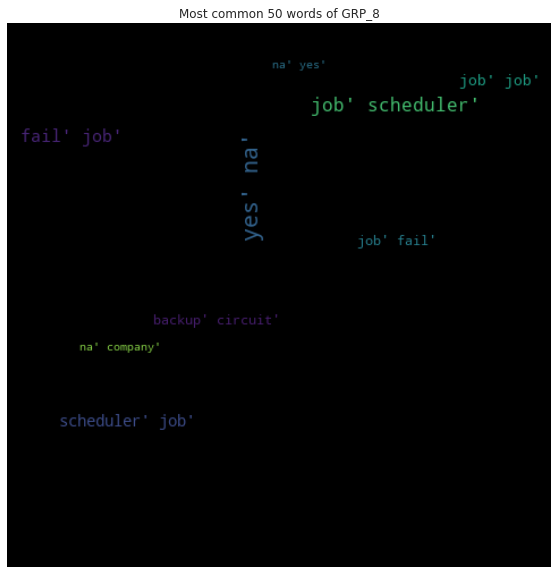

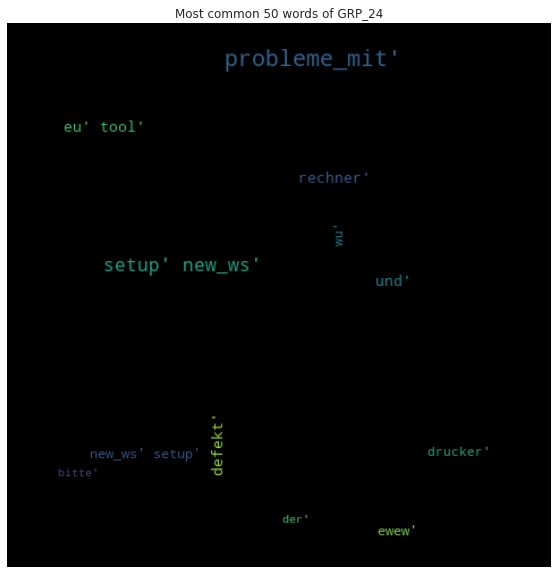

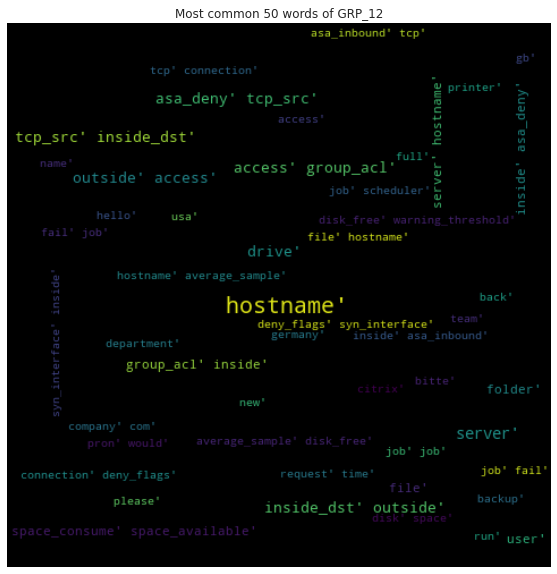

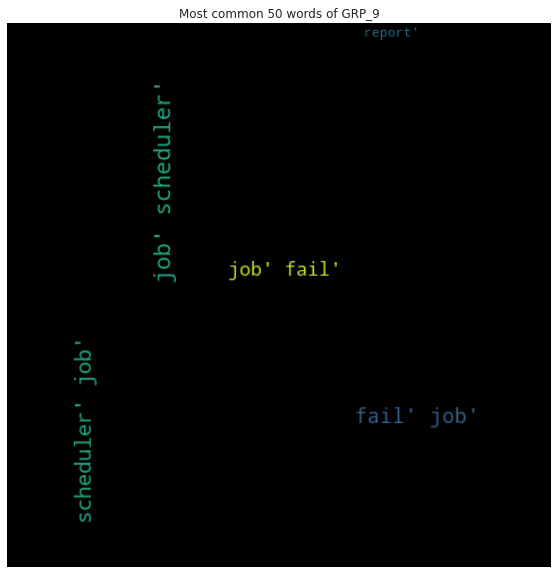

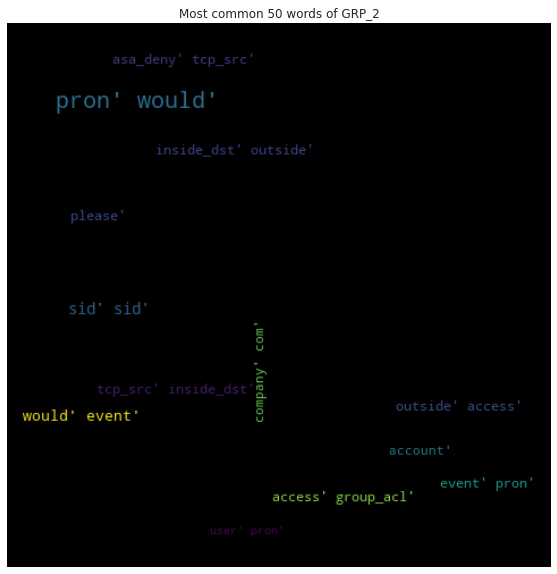

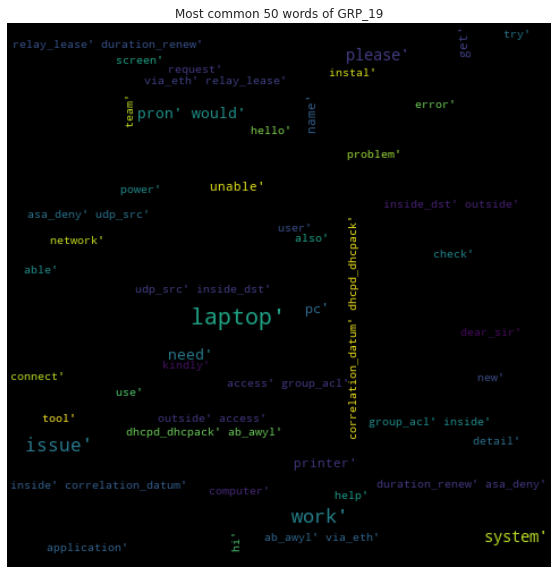

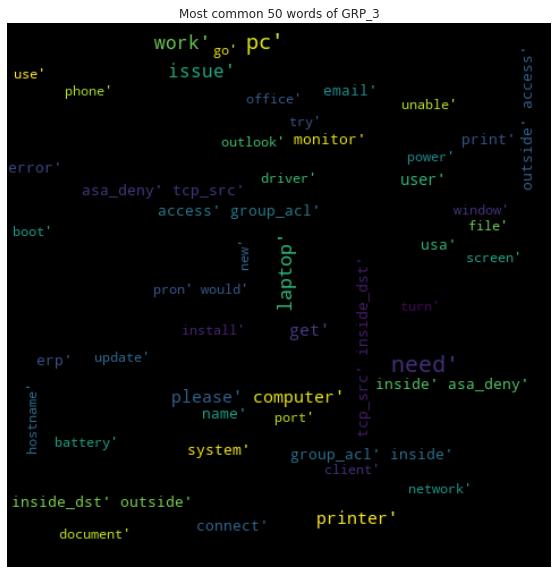

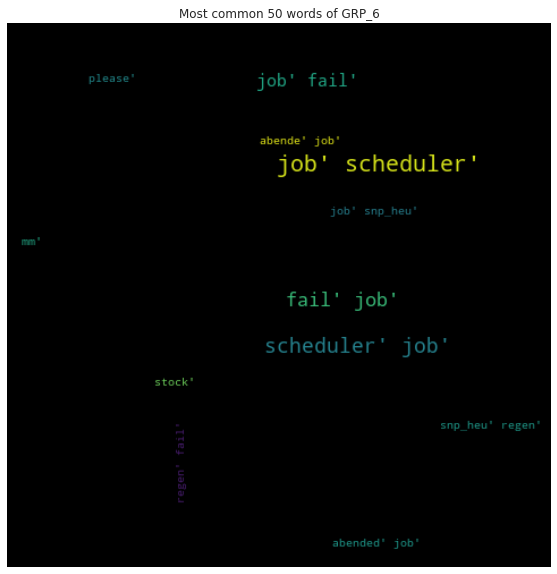

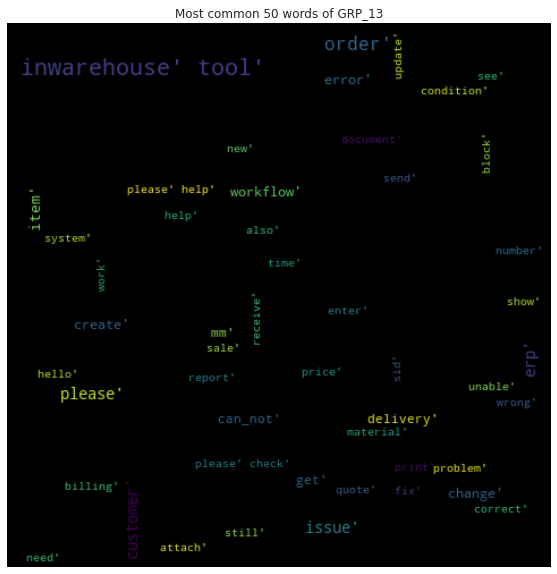

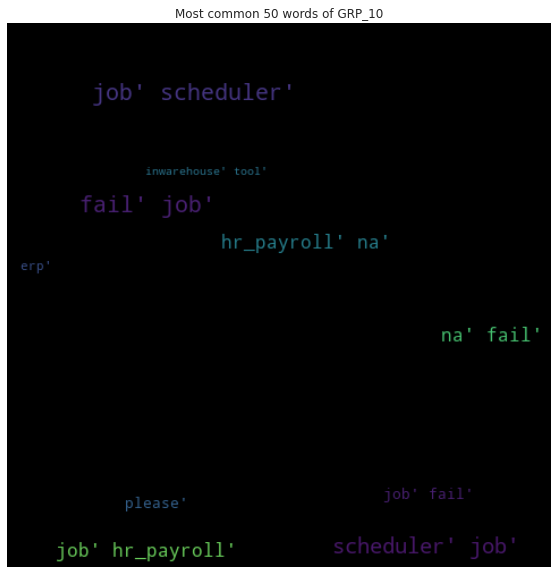

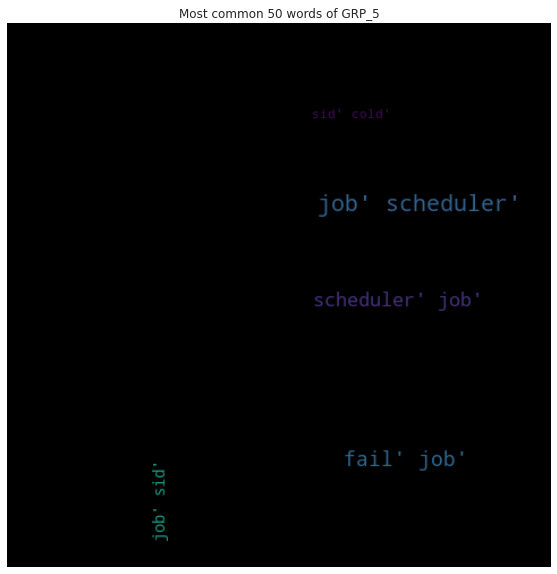

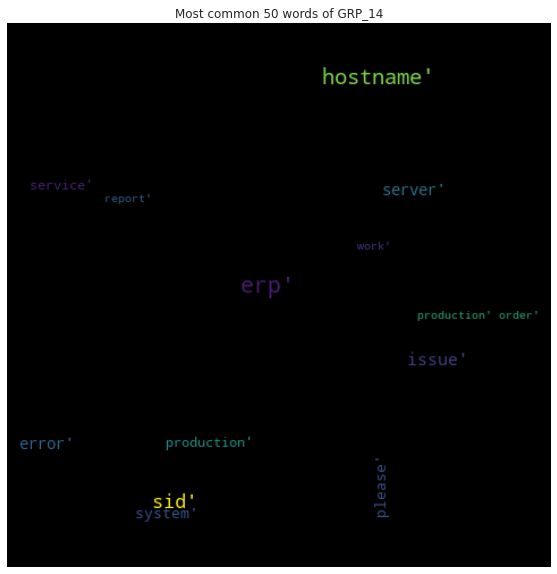

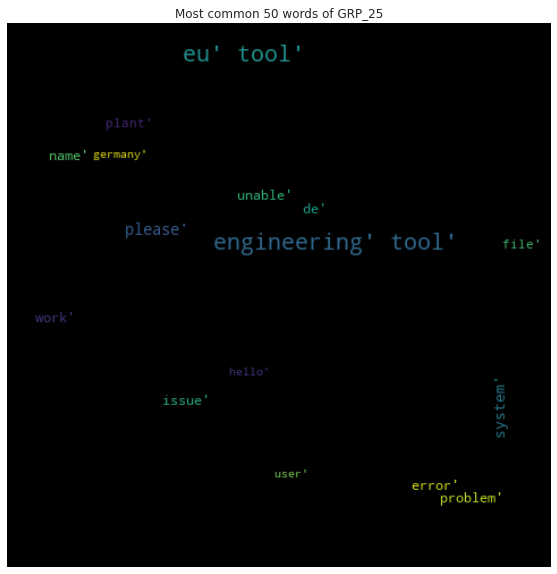

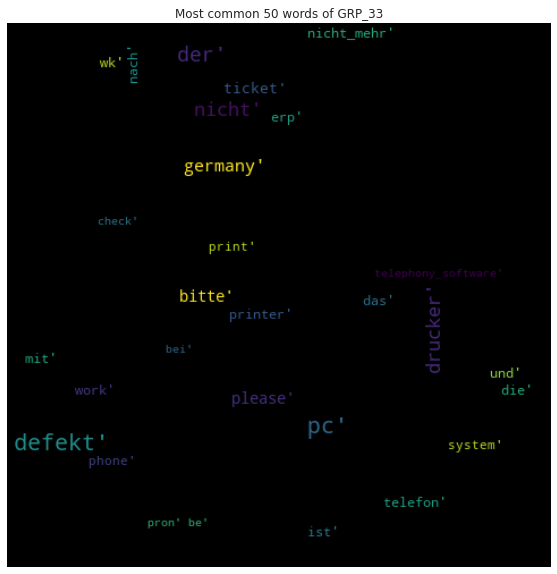

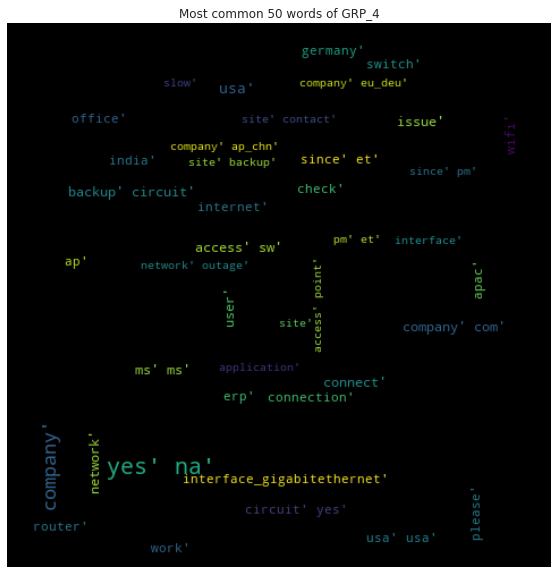

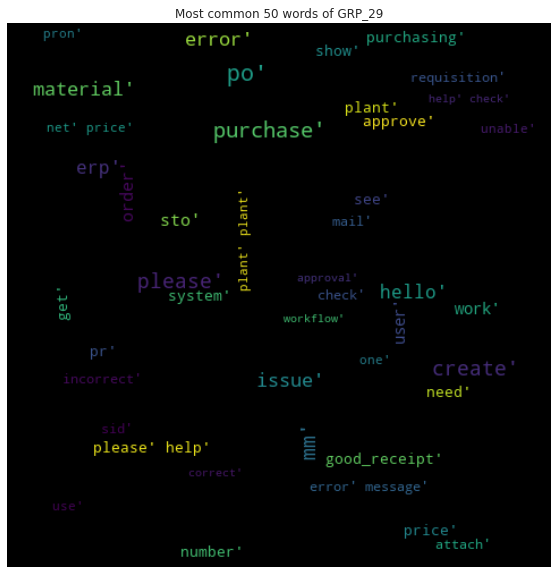

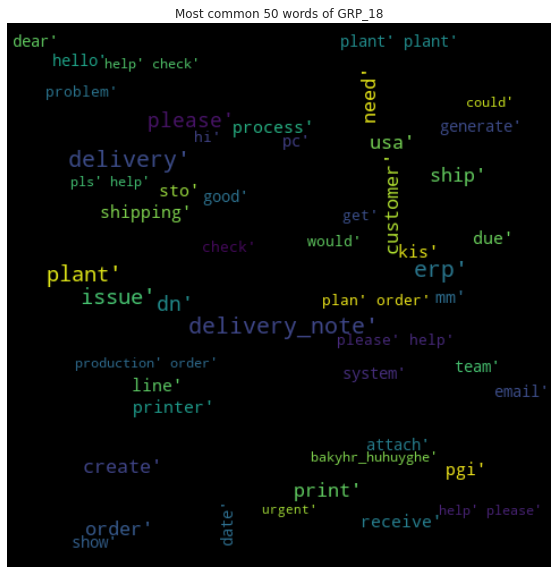

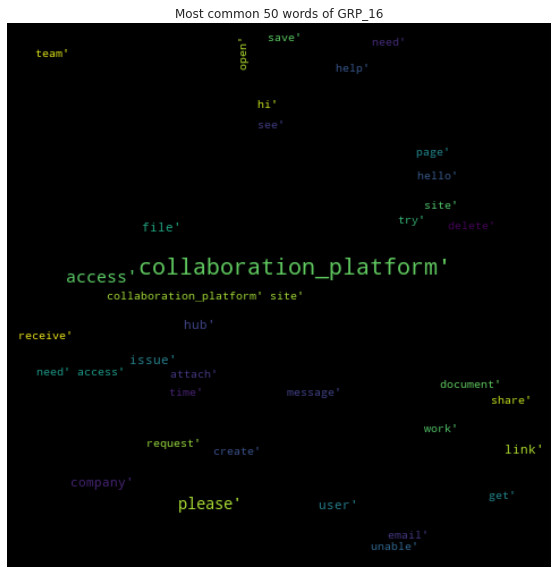

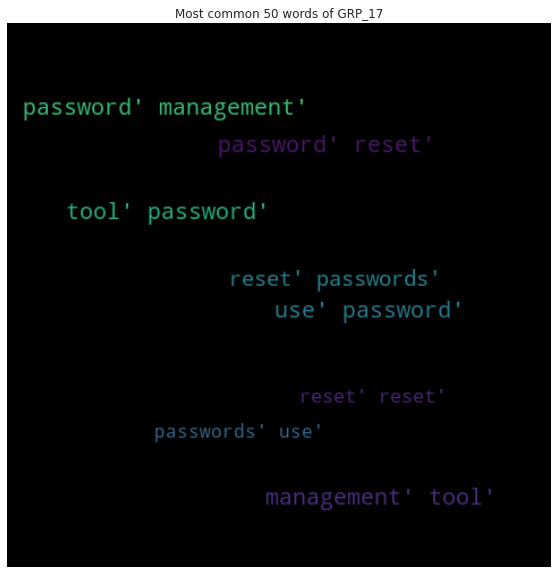

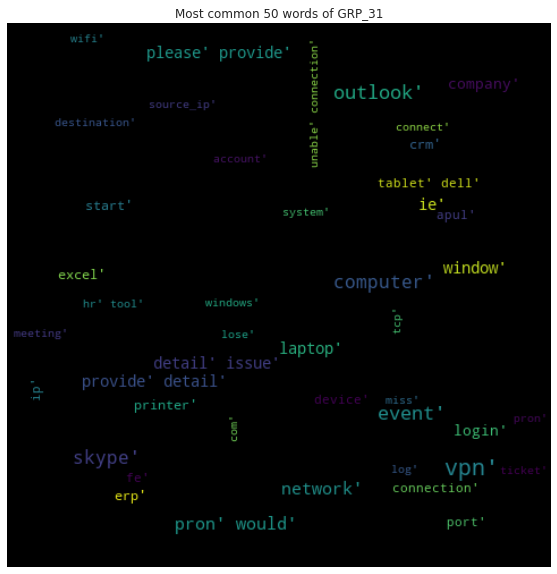

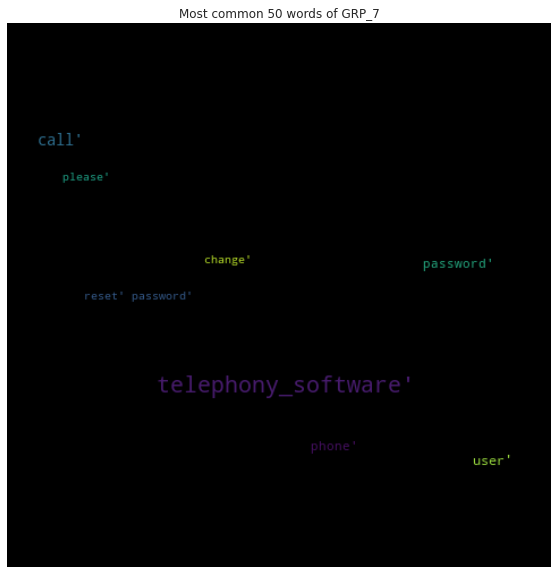

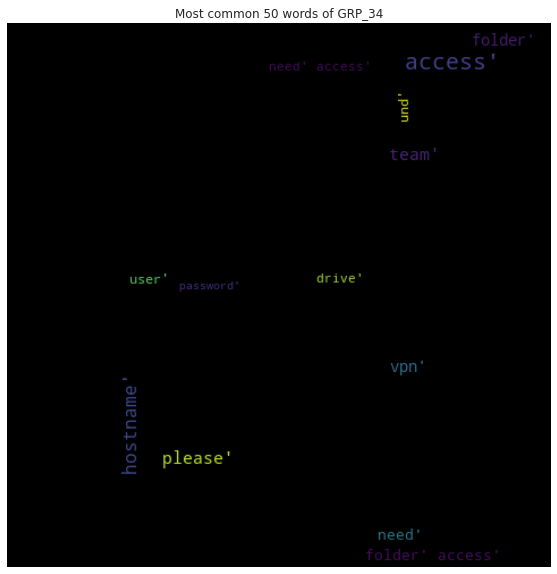

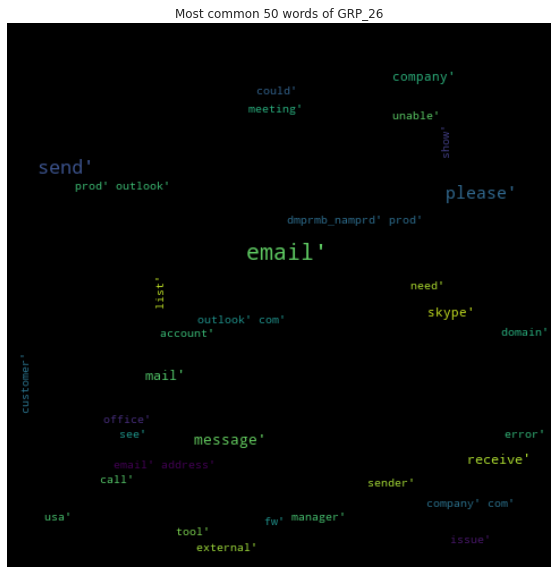

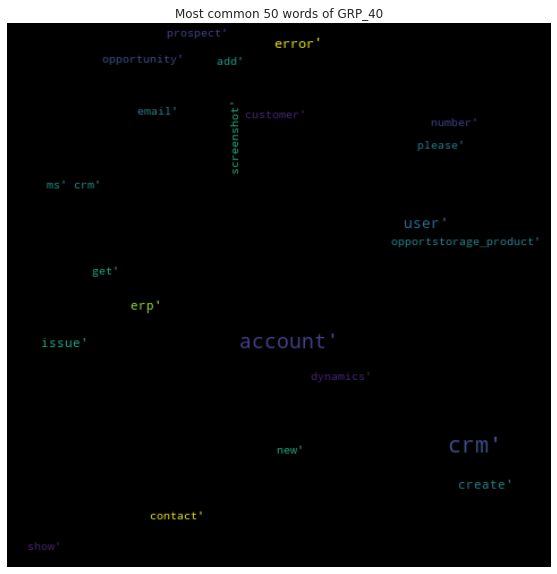

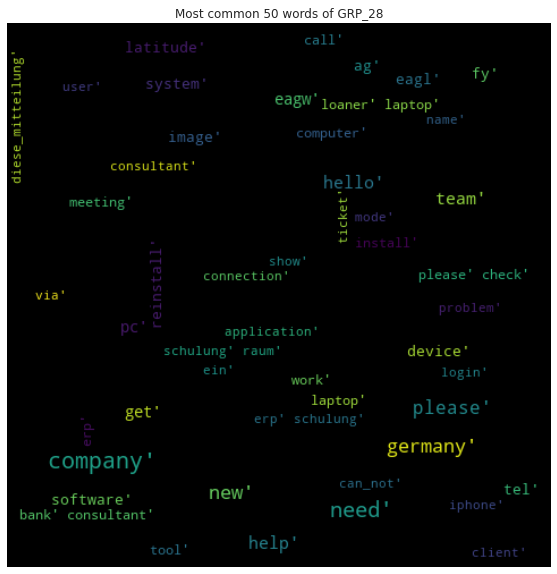

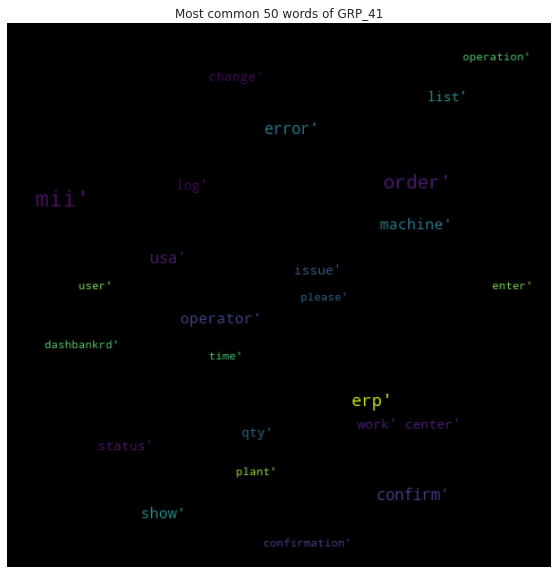

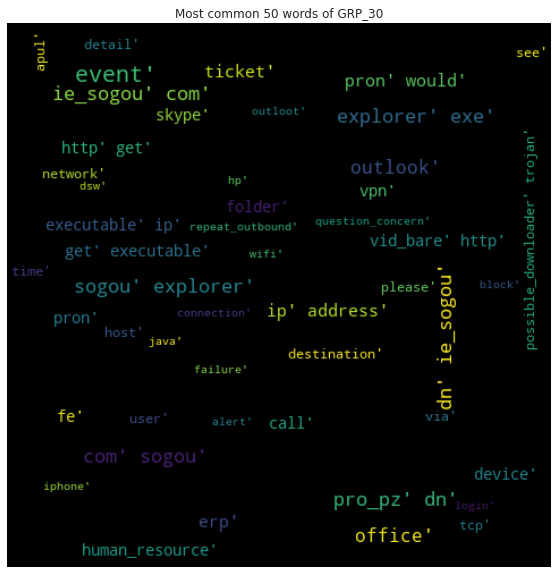

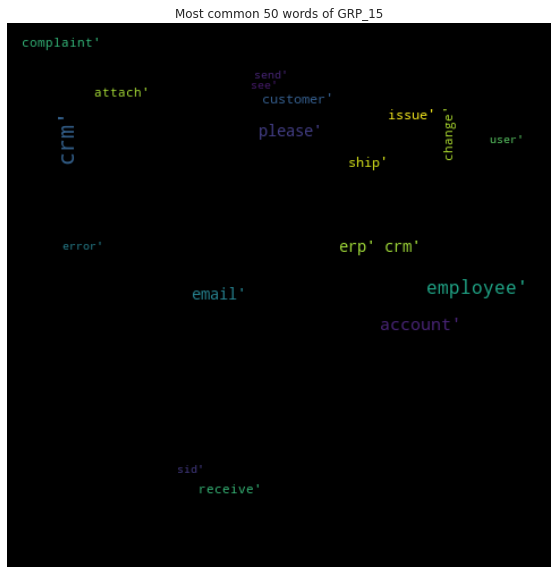

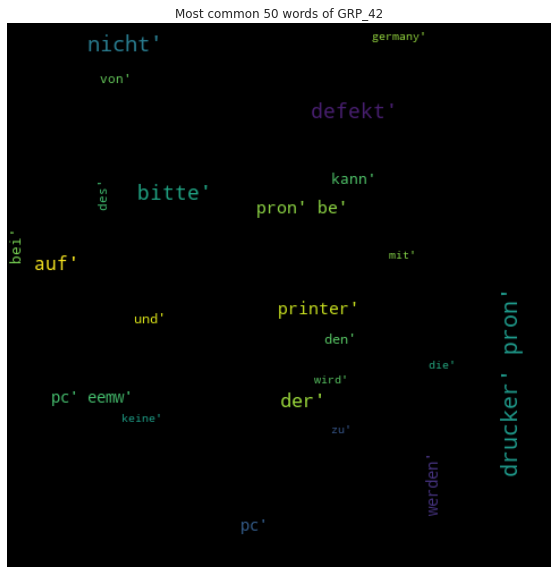

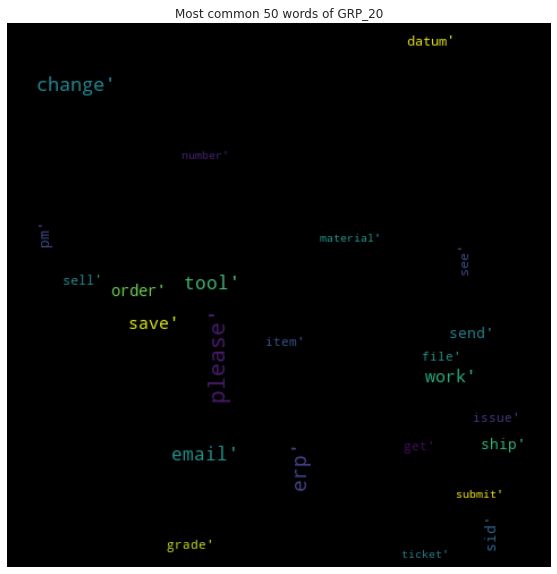

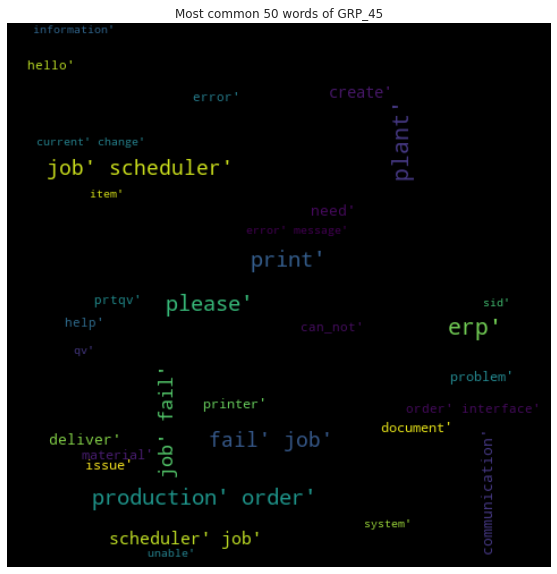

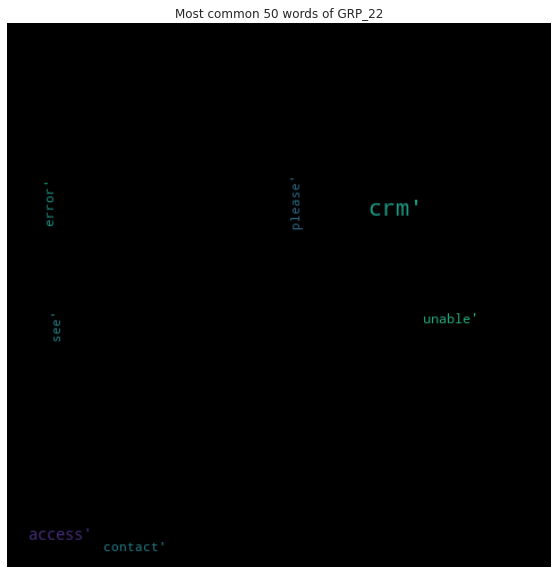

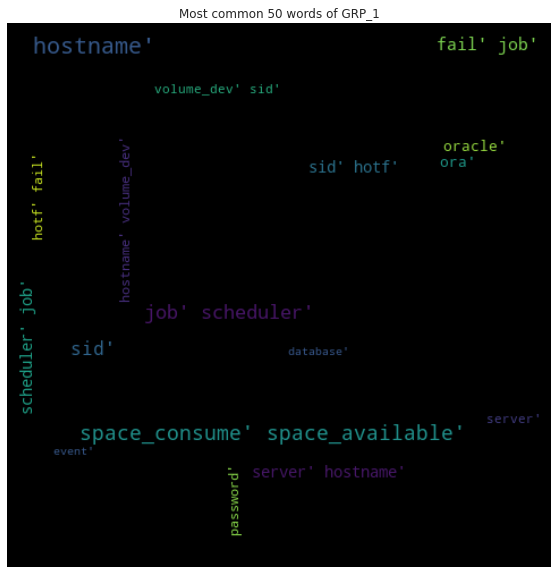

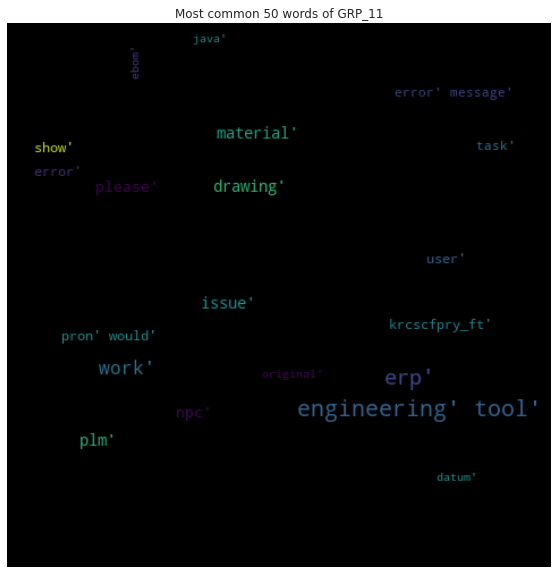

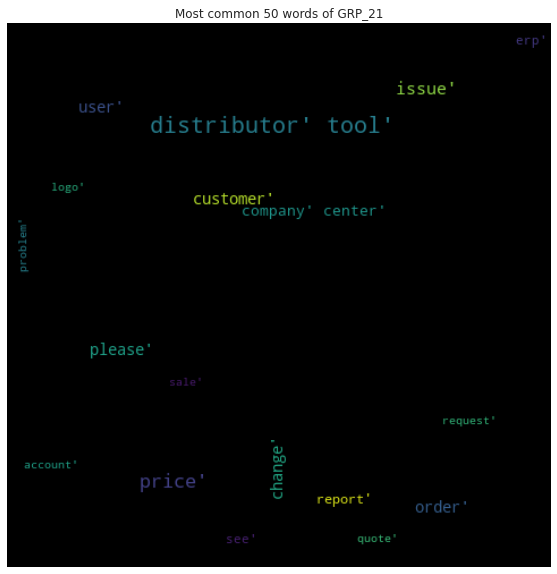

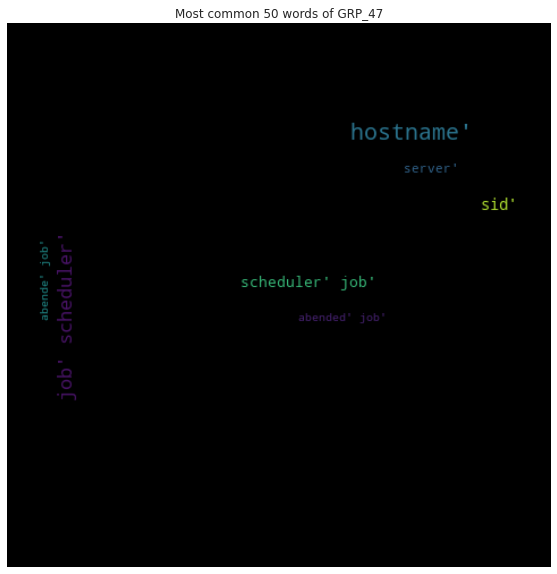

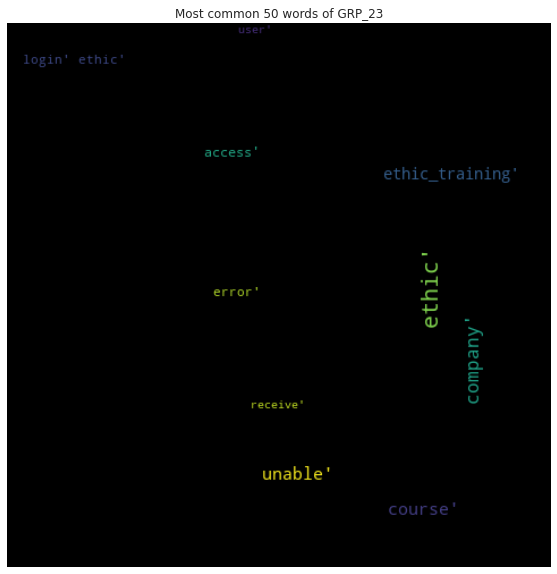

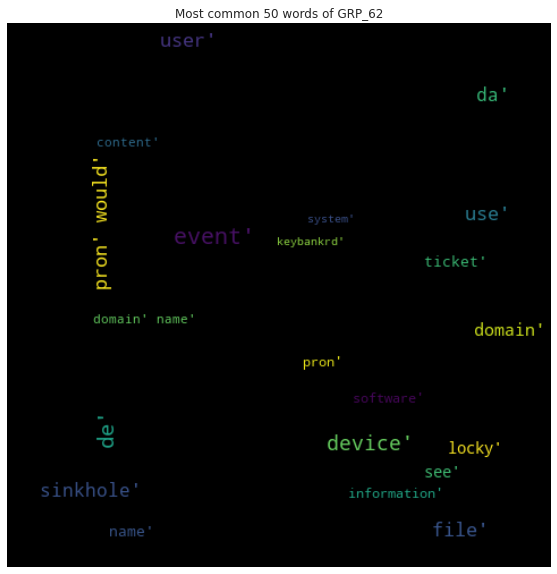

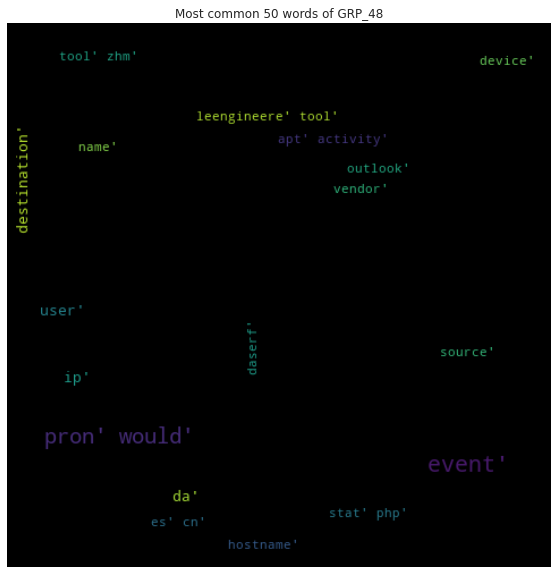

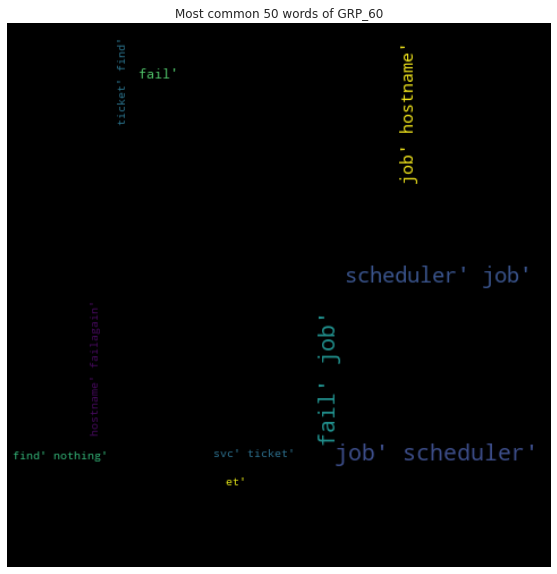

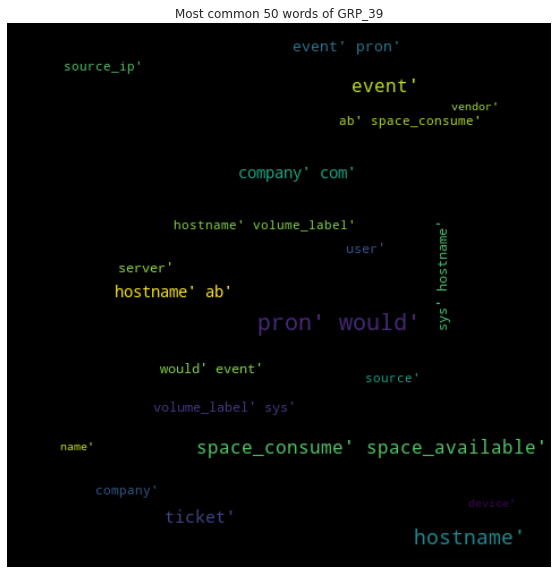

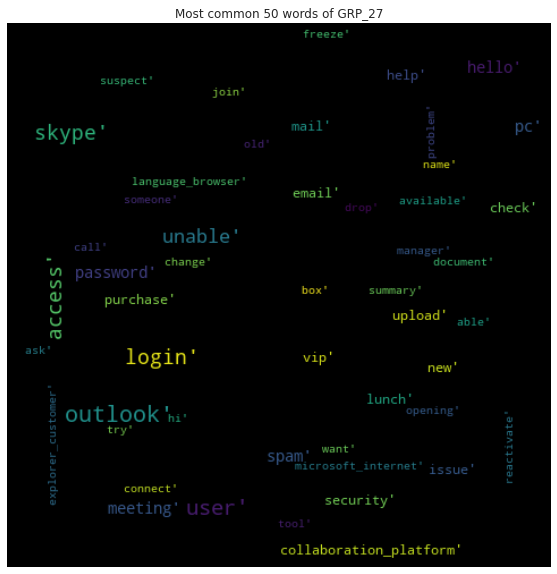

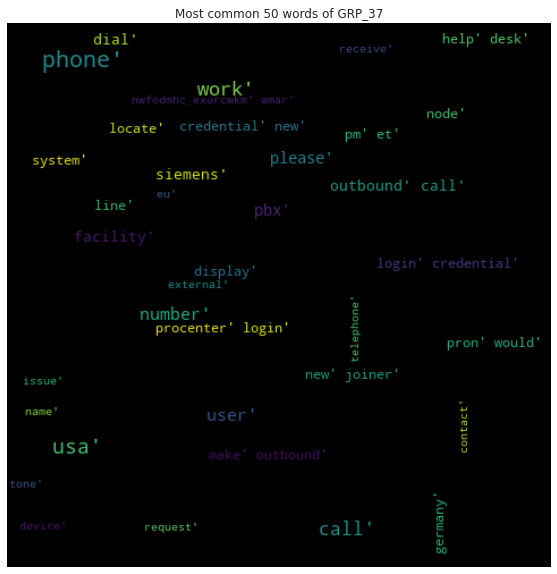

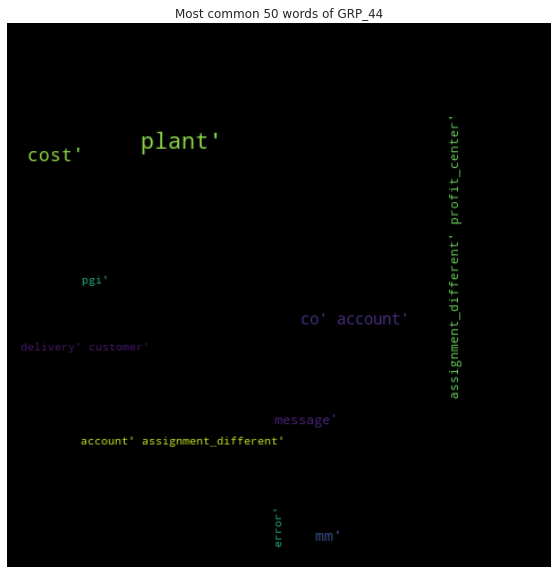

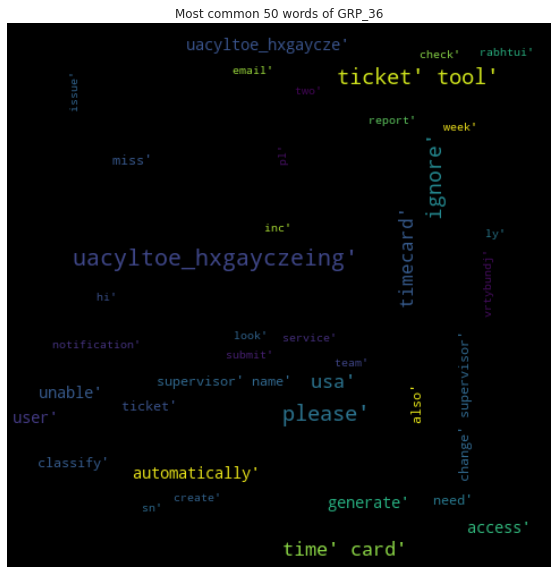

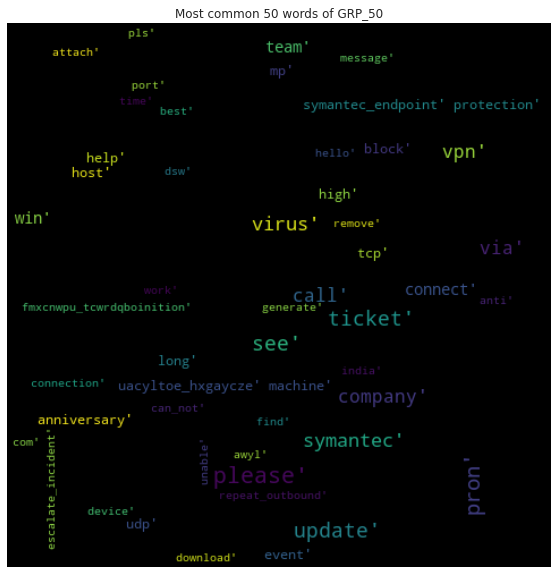

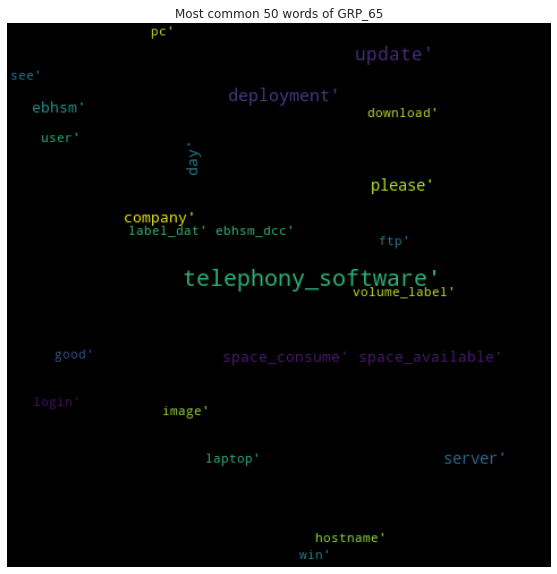

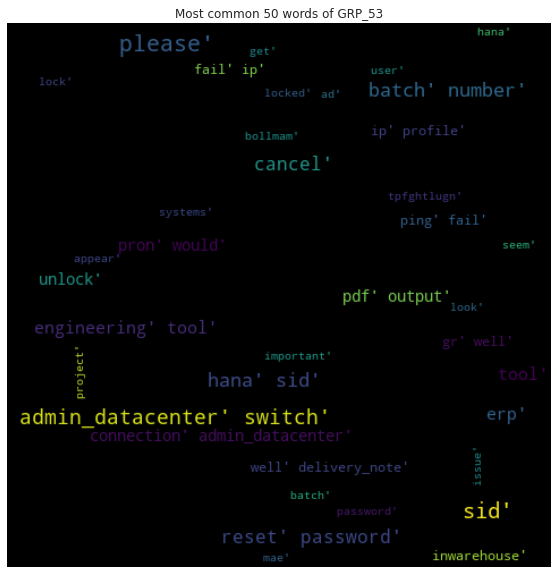

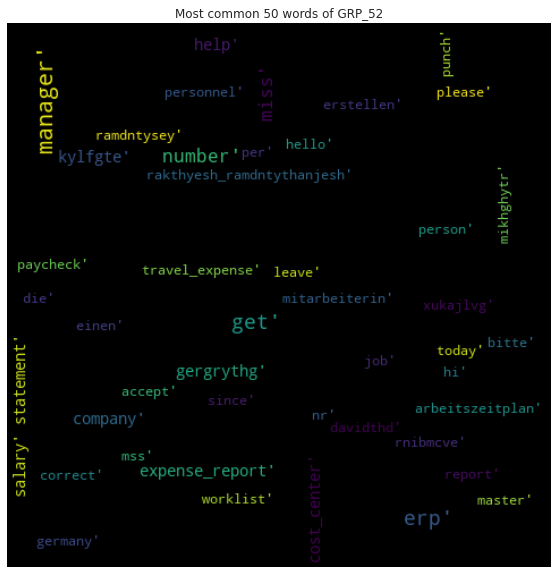

In [119]:
for i in range(50):

    Grp = new_df[test_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])